# Data Preprocessing Tools

## Importing the libraries

In [25]:
%pip install numpy pandas scikit-learn torch xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np

## Importing the dataset

In [27]:
df = pd.read_csv('Data/Preprocessed Data/preprocessed_data.csv')

In [28]:
df.head(5)

,Year,Month,station_name,humidity,TMPMAX,TMPMIN,precipitation,wind_speed_8_30am,wind_speed_17_30pm,patients,Date
0,2007,1,Gampaha,85.838710,32.0,22.1,39.399999,12.5,14.50,64,2007-01-01
1,2007,1,Batticaloa,82.064516,28.4,24.0,170.100004,8.6,10.10,0,2007-01-01
2,2007,1,Colombo,82.258065,31.8,22.9,91.100001,5.7,6.00,244,2007-01-01
3,2007,1,Galle,89.612903,29.6,23.3,78.200000,2.2,6.90,22,2007-01-01
4,2007,1,Jaffna,81.886667,29.7,22.2,12.500000,5.3,7.12,0,2007-01-01


In [29]:
df.dtypes

Year                    int64
Month                   int64
station_name           object
humidity              float64
TMPMAX                float64
TMPMIN                float64
precipitation         float64
wind_speed_8_30am     float64
wind_speed_17_30pm    float64
patients                int64
Date                   object
dtype: object

### Reduce features

In [30]:
preprocessed_df = df.copy()

In [31]:
preprocessed_df['Avg_temperature'] = preprocessed_df[['TMPMAX', 'TMPMIN']].mean(axis=1)
preprocessed_df['Avg_wind_speed'] = preprocessed_df[['wind_speed_8_30am', 'wind_speed_17_30pm']].mean(axis=1)

## Model Training - XGBOOST

### Colomco District

In [32]:
colombo_df = preprocessed_df[preprocessed_df.station_name == 'Colombo']
colombo_df.head()

,Year,Month,station_name,humidity,TMPMAX,TMPMIN,precipitation,wind_speed_8_30am,wind_speed_17_30pm,patients,Date,Avg_temperature,Avg_wind_speed
2,2007,1,Colombo,82.258065,31.8,22.9,91.100001,5.7,6.0,244,2007-01-01,27.35,5.85
13,2007,2,Colombo,84.142857,31.2,23.5,9.900000,3.4,6.3,175,2007-02-01,27.35,4.85
25,2007,3,Colombo,85.806452,31.8,24.8,60.500001,2.9,5.8,61,2007-03-01,28.30,4.35
34,2007,4,Colombo,91.433333,31.7,24.8,374.100007,1.9,5.0,35,2007-04-01,28.25,3.45
38,2007,5,Colombo,84.709677,31.4,26.4,432.400013,4.3,6.3,44,2007-05-01,28.90,5.30


In [33]:
# Drop rows where Year is equal to 2017 using query
colombo_df = colombo_df.query('Year != 2017 and Year != 2019 and Year != 2020 and Year != 2021')

In [34]:
colombo_df = colombo_df.sort_values('Date').copy()
colombo_df.drop(columns=['Date', 'Year','Month','station_name','TMPMAX','TMPMIN','wind_speed_8_30am','wind_speed_17_30pm'], inplace=True)
colombo_df.head()

,humidity,precipitation,patients,Avg_temperature,Avg_wind_speed
2,82.258065,91.100001,244,27.35,5.85
13,84.142857,9.900000,175,27.35,4.85
25,85.806452,60.500001,61,28.30,4.35
34,91.433333,374.100007,35,28.25,3.45
38,84.709677,432.400013,44,28.90,5.30


In [35]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['humidity', 'precipitation', 'Avg_temperature', 'Avg_wind_speed']

scaler = MinMaxScaler()
colombo_df[columns_to_normalize] = scaler.fit_transform(colombo_df[columns_to_normalize])

In [36]:
# def create_time_feature(df):
#     df['Quarter'] = df['Date'].dt.quarter
#     df['Month'] = df['Date'].dt.month
#     df['Year'] = df['Date'].dt.year
#     return df

In [37]:
# colombo_df = create_time_feature(colombo_df)
# colombo_df.head()

In [38]:
colombo_df['humidity-2'] = colombo_df['humidity'].shift(2)
colombo_df['precipitation-2'] = colombo_df['precipitation'].shift(2)
colombo_df['precipitation-5'] = colombo_df['precipitation'].shift(5)
colombo_df.head()

,humidity,precipitation,patients,Avg_temperature,Avg_wind_speed,humidity-2,precipitation-2,precipitation-5
2,0.489939,0.092745,244,0.238806,0.647482,NaN,NaN,NaN
13,0.580845,0.009068,175,0.238806,0.503597,NaN,NaN,NaN
25,0.661083,0.061212,61,0.522388,0.431655,0.489939,0.092745,NaN
34,0.932476,0.384378,35,0.507463,0.302158,0.580845,0.009068,NaN
38,0.608184,0.444456,44,0.701493,0.568345,0.661083,0.061212,NaN


In [39]:
colombo_df = colombo_df.tail(colombo_df.shape[0]-5)

In [40]:
colombo_df.head()

,humidity,precipitation,patients,Avg_temperature,Avg_wind_speed,humidity-2,precipitation-2,precipitation-5
53,0.649518,0.081204,102,0.552239,0.575540,0.932476,0.384378,0.092745
60,0.695312,0.108718,163,0.388060,0.568345,0.608184,0.444456,0.009068
70,0.684421,0.267312,128,0.388060,0.618705,0.649518,0.081204,0.061212
78,0.686495,0.132110,158,0.402985,0.589928,0.695312,0.108718,0.384378
88,0.892905,0.299876,178,0.104478,0.287770,0.684421,0.267312,0.444456


In [41]:
# Reorder columns
colombo_df = colombo_df.iloc[:, [0,5,1,6,7,3,4,2]]

In [42]:
colombo_df.drop(columns=['humidity','precipitation'], inplace=True)
colombo_df.head()

,humidity-2,precipitation-2,precipitation-5,Avg_temperature,Avg_wind_speed,patients
53,0.932476,0.384378,0.092745,0.552239,0.575540,102
60,0.608184,0.444456,0.009068,0.388060,0.568345,163
70,0.649518,0.081204,0.061212,0.388060,0.618705,128
78,0.695312,0.108718,0.384378,0.402985,0.589928,158
88,0.684421,0.267312,0.444456,0.104478,0.287770,178


In [44]:
split_ratio = 0.9
total_rows = colombo_df.shape[0]
train_size = int(total_rows*split_ratio)
 
# Split data into test and train
train = colombo_df[0:train_size]
test = colombo_df[train_size:]

In [45]:
print(train.shape[0], test.shape[0])

135 16


In [46]:
train.head()

,humidity-2,precipitation-2,precipitation-5,Avg_temperature,Avg_wind_speed,patients
53,0.932476,0.384378,0.092745,0.552239,0.575540,102
60,0.608184,0.444456,0.009068,0.388060,0.568345,163
70,0.649518,0.081204,0.061212,0.388060,0.618705,128
78,0.695312,0.108718,0.384378,0.402985,0.589928,158
88,0.684421,0.267312,0.444456,0.104478,0.287770,178


In [47]:
test.head()

,humidity-2,precipitation-2,precipitation-5,Avg_temperature,Avg_wind_speed,patients
1695,0.431672,0.011748,0.487531,0.492537,0.532374,234
1707,0.431672,0.115416,0.361294,0.283582,0.503597,154
1716,0.412379,0.100577,0.092642,0.283582,0.402878,150
1720,0.586013,0.520919,0.011748,0.149254,0.654676,131
1734,0.467846,0.283904,0.115416,0.164179,0.877698,1065


In [48]:
X_train = train.drop('patients', axis =1)
y_train = train['patients']

X_test = test.drop('patients', axis =1)
y_test = test['patients']

In [49]:
print(y_train)

53      102
60      163
70      128
78      158
88      178
       ... 
1652     57
1657     74
1671    132
1676    213
1691    232
Name: patients, Length: 135, dtype: int64


In [50]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=100 , max_depth=3, learning_rate=0.1, random_state=0, objective='reg:squarederror')
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

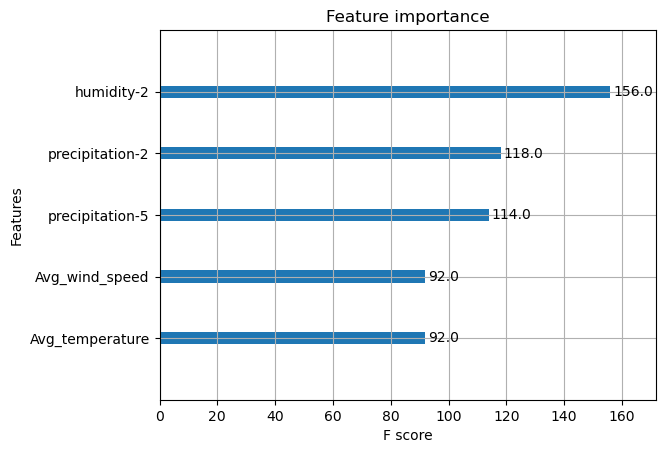

In [51]:
xgb.plot_importance(reg)

In [52]:
train['patients_Prediction'] = reg.predict(X_train)

C:\Users\User\AppData\Local\Temp\ipykernel_16140\3124123449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['patients_Prediction'] = reg.predict(X_train)


In [53]:
train.to_csv("train_Prediction.csv", index=None)

In [54]:
test['patients_Prediction'] = reg.predict(X_test)

C:\Users\User\AppData\Local\Temp\ipykernel_16140\1297916988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['patients_Prediction'] = reg.predict(X_test)


In [55]:
test.to_csv("test_Prediction.csv", index=None)

In [56]:
test.head()

,humidity-2,precipitation-2,precipitation-5,Avg_temperature,Avg_wind_speed,patients,patients_Prediction
1695,0.431672,0.011748,0.487531,0.492537,0.532374,234,336.190552
1707,0.431672,0.115416,0.361294,0.283582,0.503597,154,412.150238
1716,0.412379,0.100577,0.092642,0.283582,0.402878,150,366.467834
1720,0.586013,0.520919,0.011748,0.149254,0.654676,131,665.501709
1734,0.467846,0.283904,0.115416,0.164179,0.877698,1065,1217.877197


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print('RMSE: ', round(mean_squared_error(y_true=test['patients'],y_pred=test['patients_Prediction']),3))
print('MAE: ', round(mean_absolute_error(y_true=test['patients'],y_pred=test['patients_Prediction']),3))
print('MAPE: ', round(mean_absolute_percentage_error(y_true=test['patients'],y_pred=test['patients_Prediction']),3))

RMSE:  338055.772
MAE:  447.338
MAPE:  0.779
